In [34]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('combined_novelty_error.csv')
df


Target Variable Method  Batch        evalt  \
0    target_CHEMBL240     logp     RF      1   sorted_fcv   
1    target_CHEMBL240     logp     RF      2   sorted_fcv   
2    target_CHEMBL240     logp     RF      3   sorted_fcv   
3    target_CHEMBL240     logp     RF      4   sorted_fcv   
4    target_CHEMBL240     logp     RF      5   sorted_fcv   
..                ...      ...    ...    ...          ...   
337  target_CHEMBL279     None    MLP      6  scaffold_CV   
338  target_CHEMBL279     None    MLP      7  scaffold_CV   
339  target_CHEMBL279     None    MLP      8  scaffold_CV   
340  target_CHEMBL279     None    MLP      9  scaffold_CV   
341  target_CHEMBL279     None    MLP     10  scaffold_CV   

     Low Similarity Count  Novelty Error  
0                      18       0.530934  
1                      14       0.677165  
2                      33       1.179075  
3                      27       0.609007  
4                      19       0.783379  
..                    ...            ...  
337                    16       1.139647  
338                    19       0.702953  
339                    11       0.511511  
340                    11       0.998548  
341                    15       1.614102  

[342 rows x 7 columns]

In [36]:
mean = df[df["Method"]=="RF"]

mean.groupby("evalt")[["Novelty Error"]].describe() 


Novelty Error                                                    \
                     count      mean       std       min       25%       50%   
evalt                                                                          
CV                    30.0  0.803699  0.414506  0.000000  0.511633  0.818550   
scaffold_CV           30.0  0.804781  0.484452  0.104000  0.535619  0.731774   
sorted_fcv            27.0  0.837274  0.223303  0.284067  0.686336  0.848533   
unsorted_fcv          27.0  0.786612  0.306328  0.197200  0.569898  0.829232   

                                  
                   75%       max  
evalt                             
CV            1.118750  1.773000  
scaffold_CV   0.920053  2.945800  
sorted_fcv    0.948002  1.336323  
unsorted_fcv  0.935101  1.644000

target_CHEMBL240
sorted_fcv


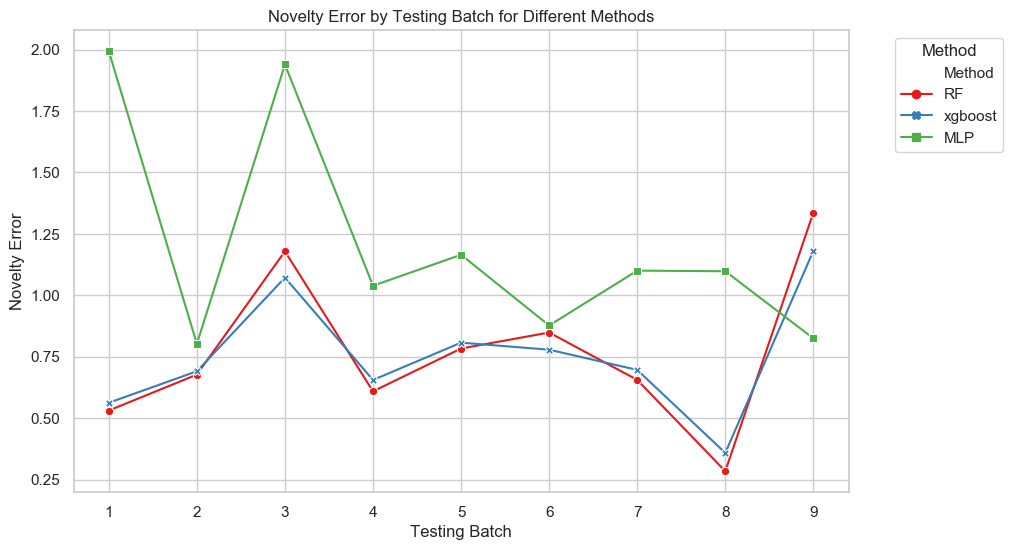

target_CHEMBL240
unsorted_fcv


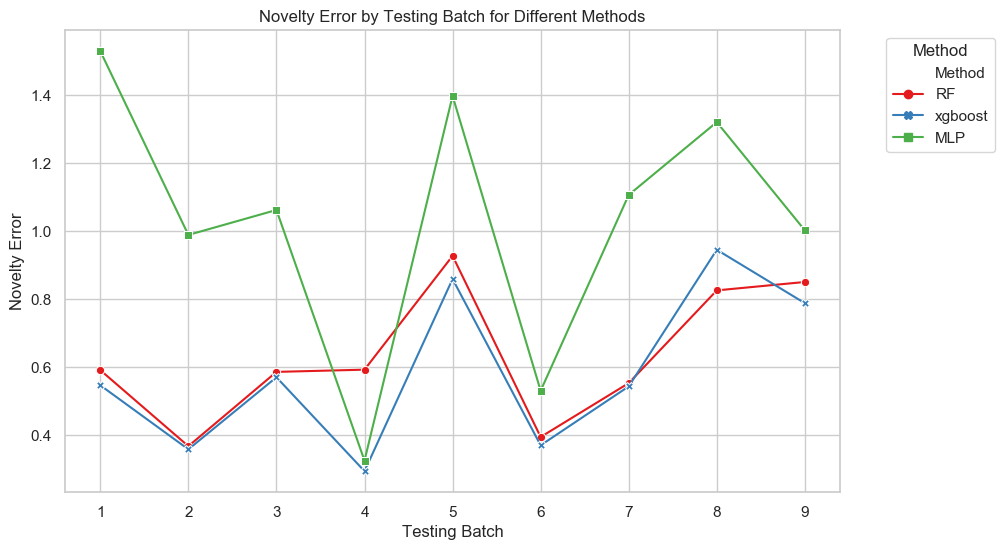

target_CHEMBL240
CV


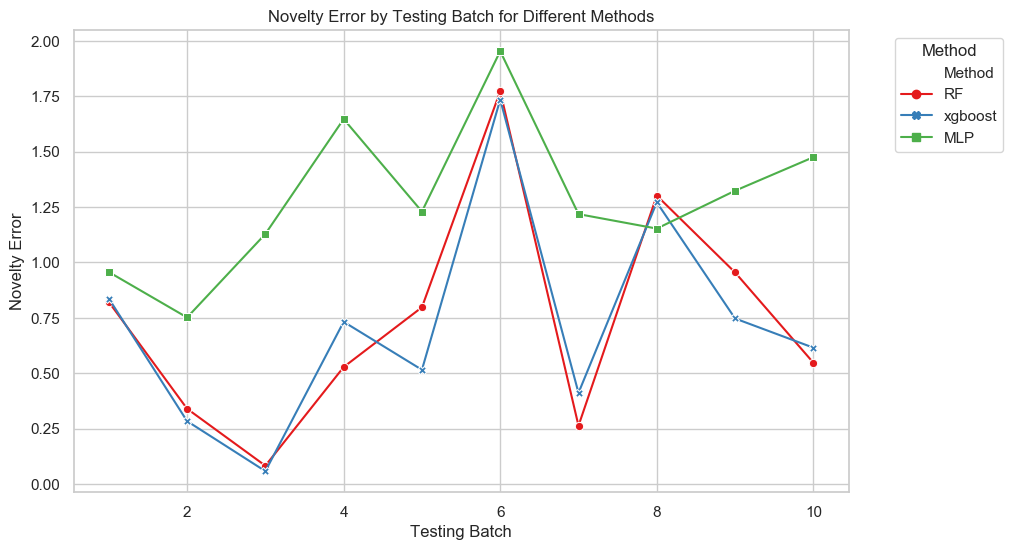

target_CHEMBL240
scaffold_CV


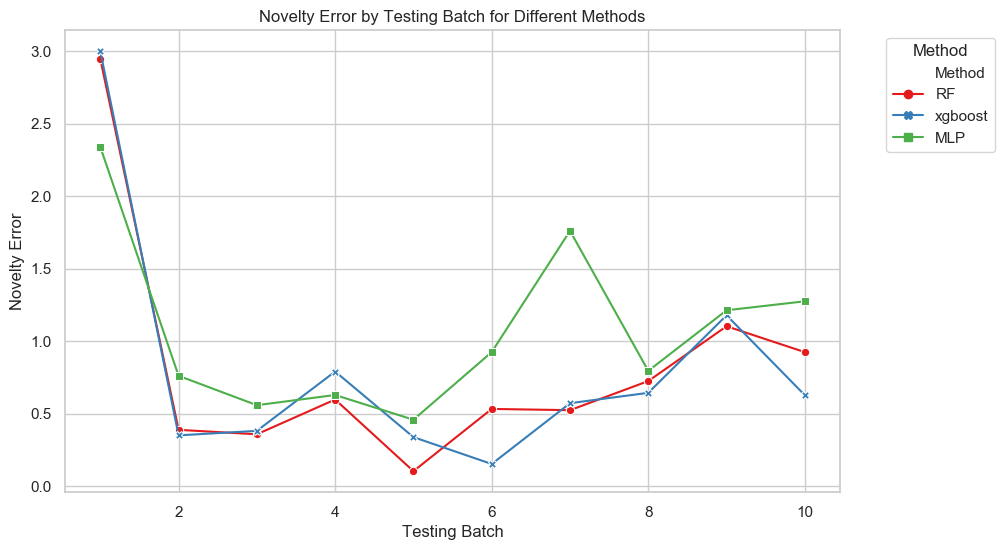

target_CHEMBL260
sorted_fcv


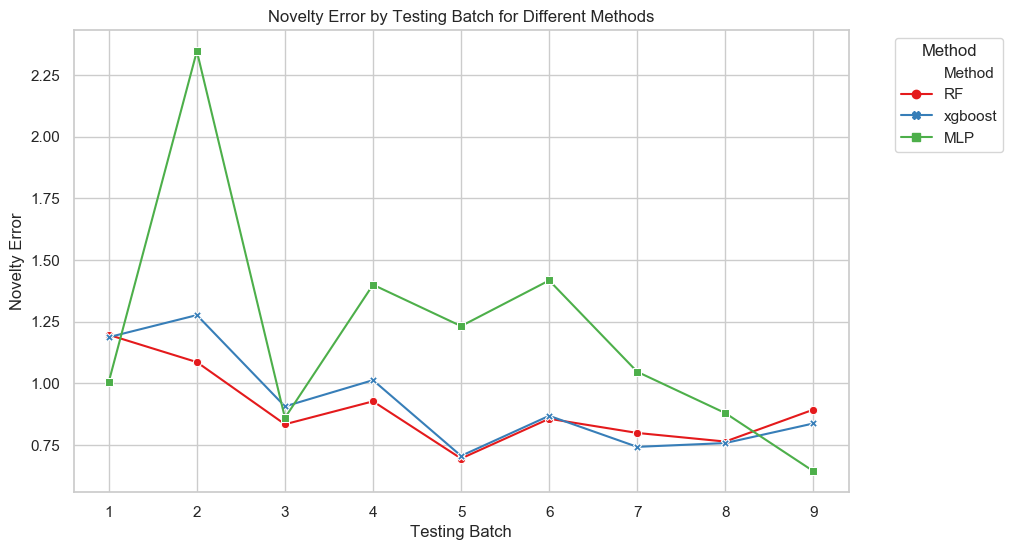

target_CHEMBL260
unsorted_fcv


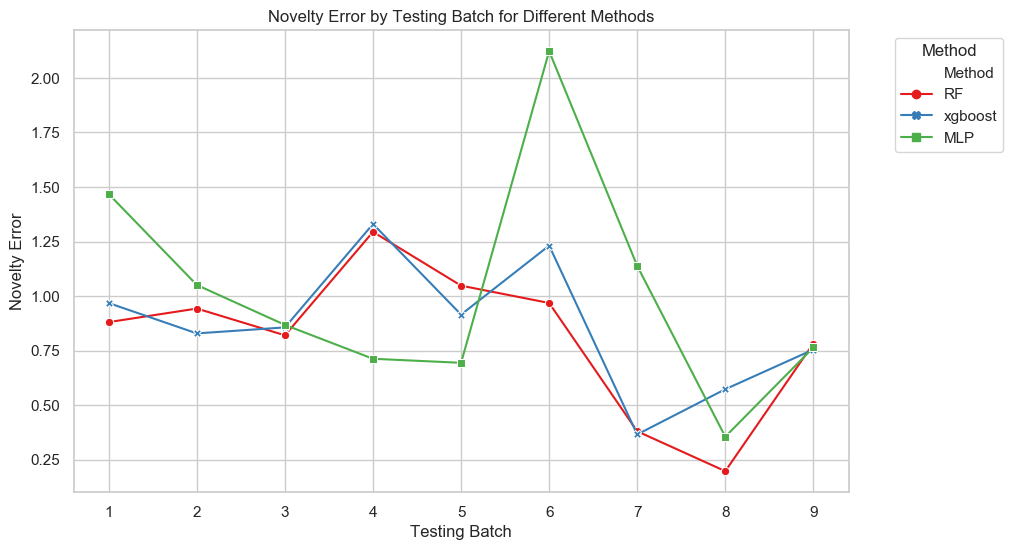

target_CHEMBL260
CV


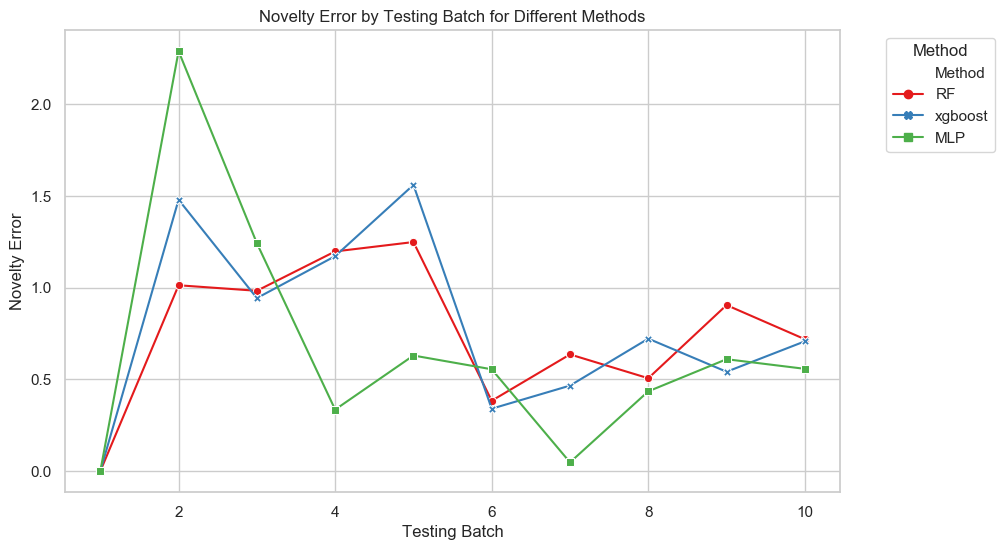

target_CHEMBL260
scaffold_CV


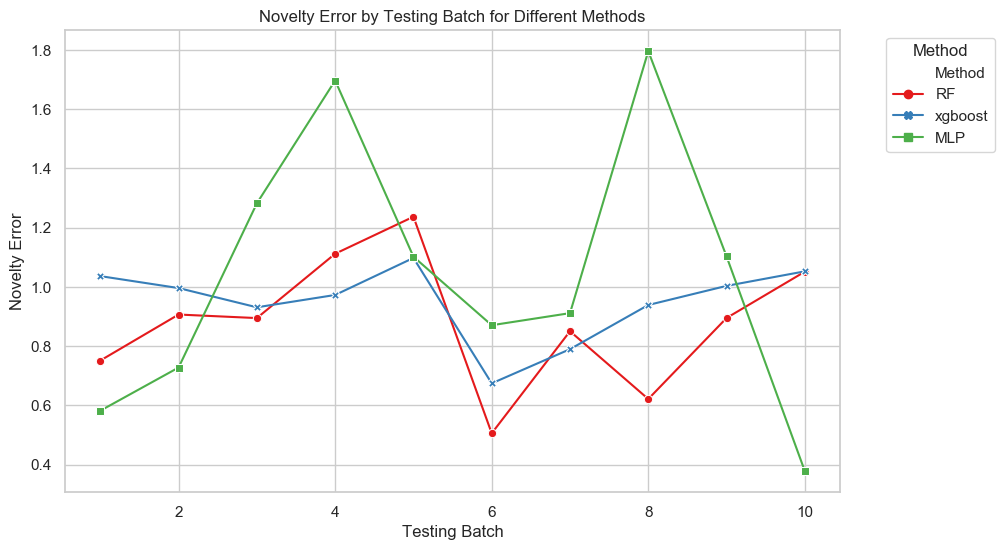

target_CHEMBL279
sorted_fcv


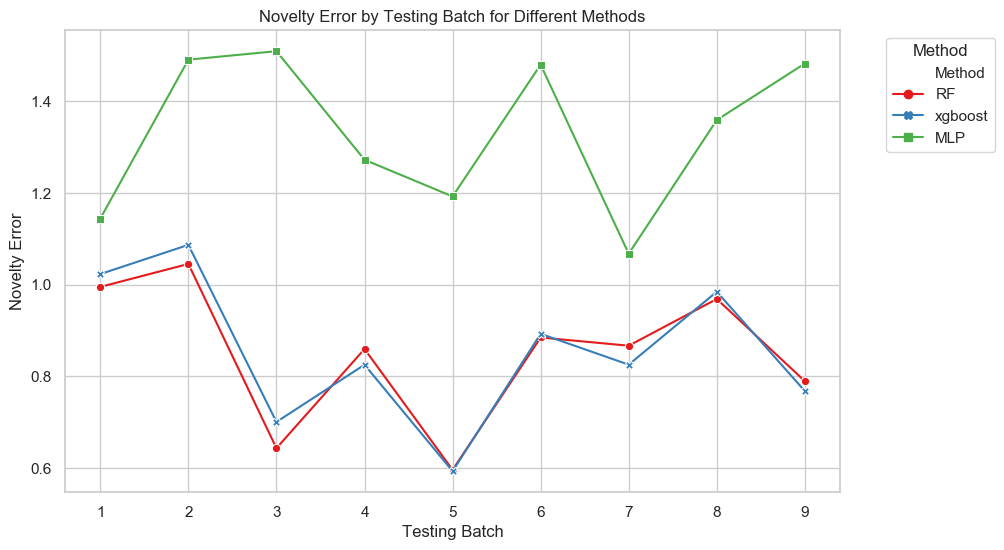

target_CHEMBL279
unsorted_fcv


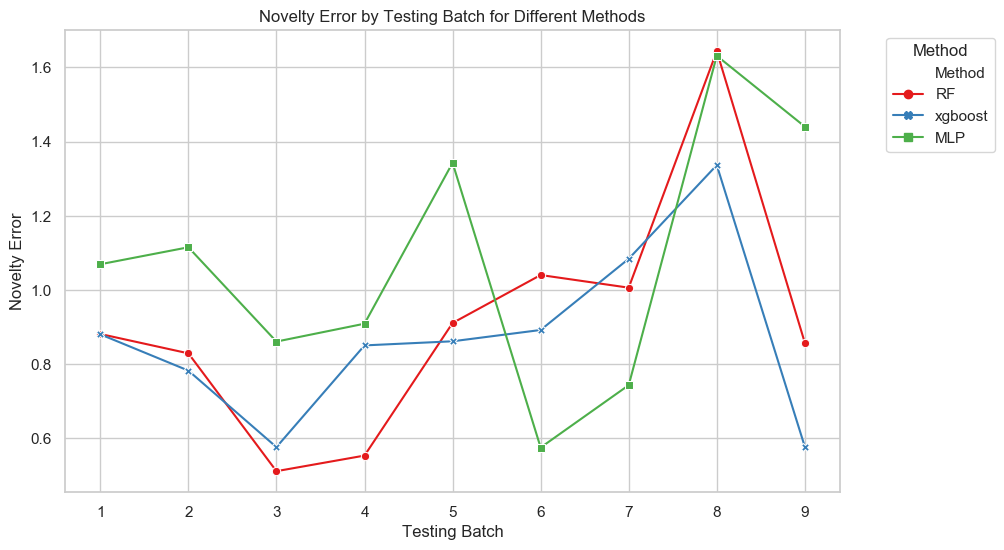

target_CHEMBL279
CV


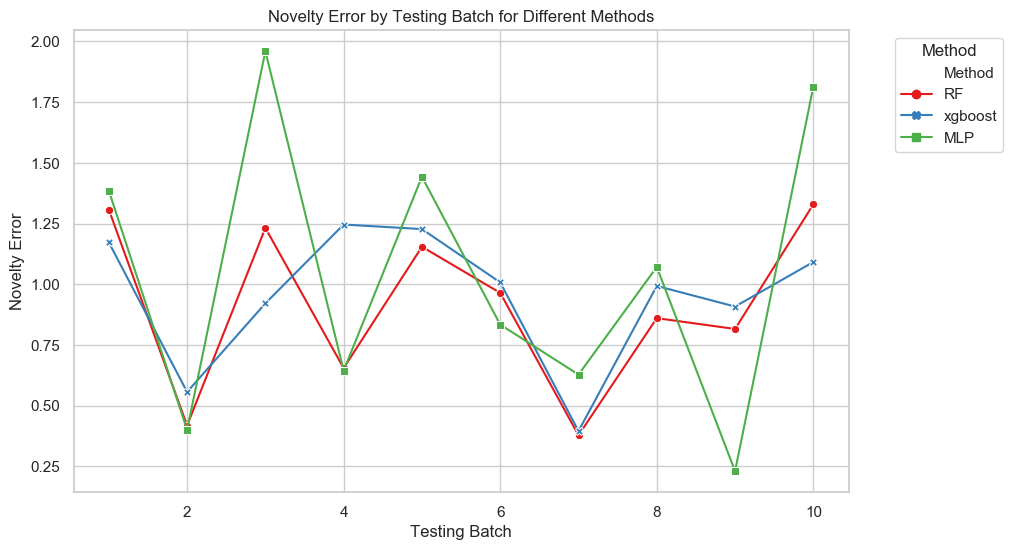

target_CHEMBL279
scaffold_CV


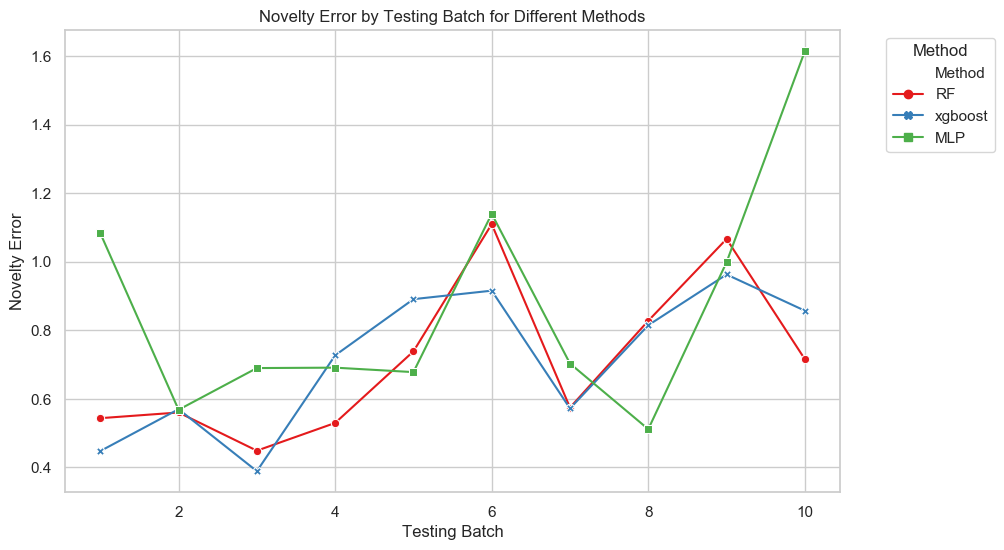

In [37]:
sns.set(style="whitegrid")
    
for target in df.Target.unique():
    for evalt in df.evalt.unique():    
        print(target)
        print(evalt)

        test = df[df["Target"]==target]
        test = test[test["evalt"]==evalt]
        test = test[test["Variable"]!="pchembl"]
        # Set up the visualization


        plt.figure(figsize=(10, 6))

        # Create a line plot with scatter points
        sns.lineplot(data=test, x='Batch', y='Novelty Error', hue='Method', 
                     marker='o', palette='Set1', markers=True, style='Method', dashes=False)

        # Customize the plot
        plt.title('Novelty Error by Testing Batch for Different Methods')
        plt.xlabel('Testing Batch')
        plt.ylabel('Novelty Error')
        plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')

        # Show the plot
        plt.show()

sorted_fcv


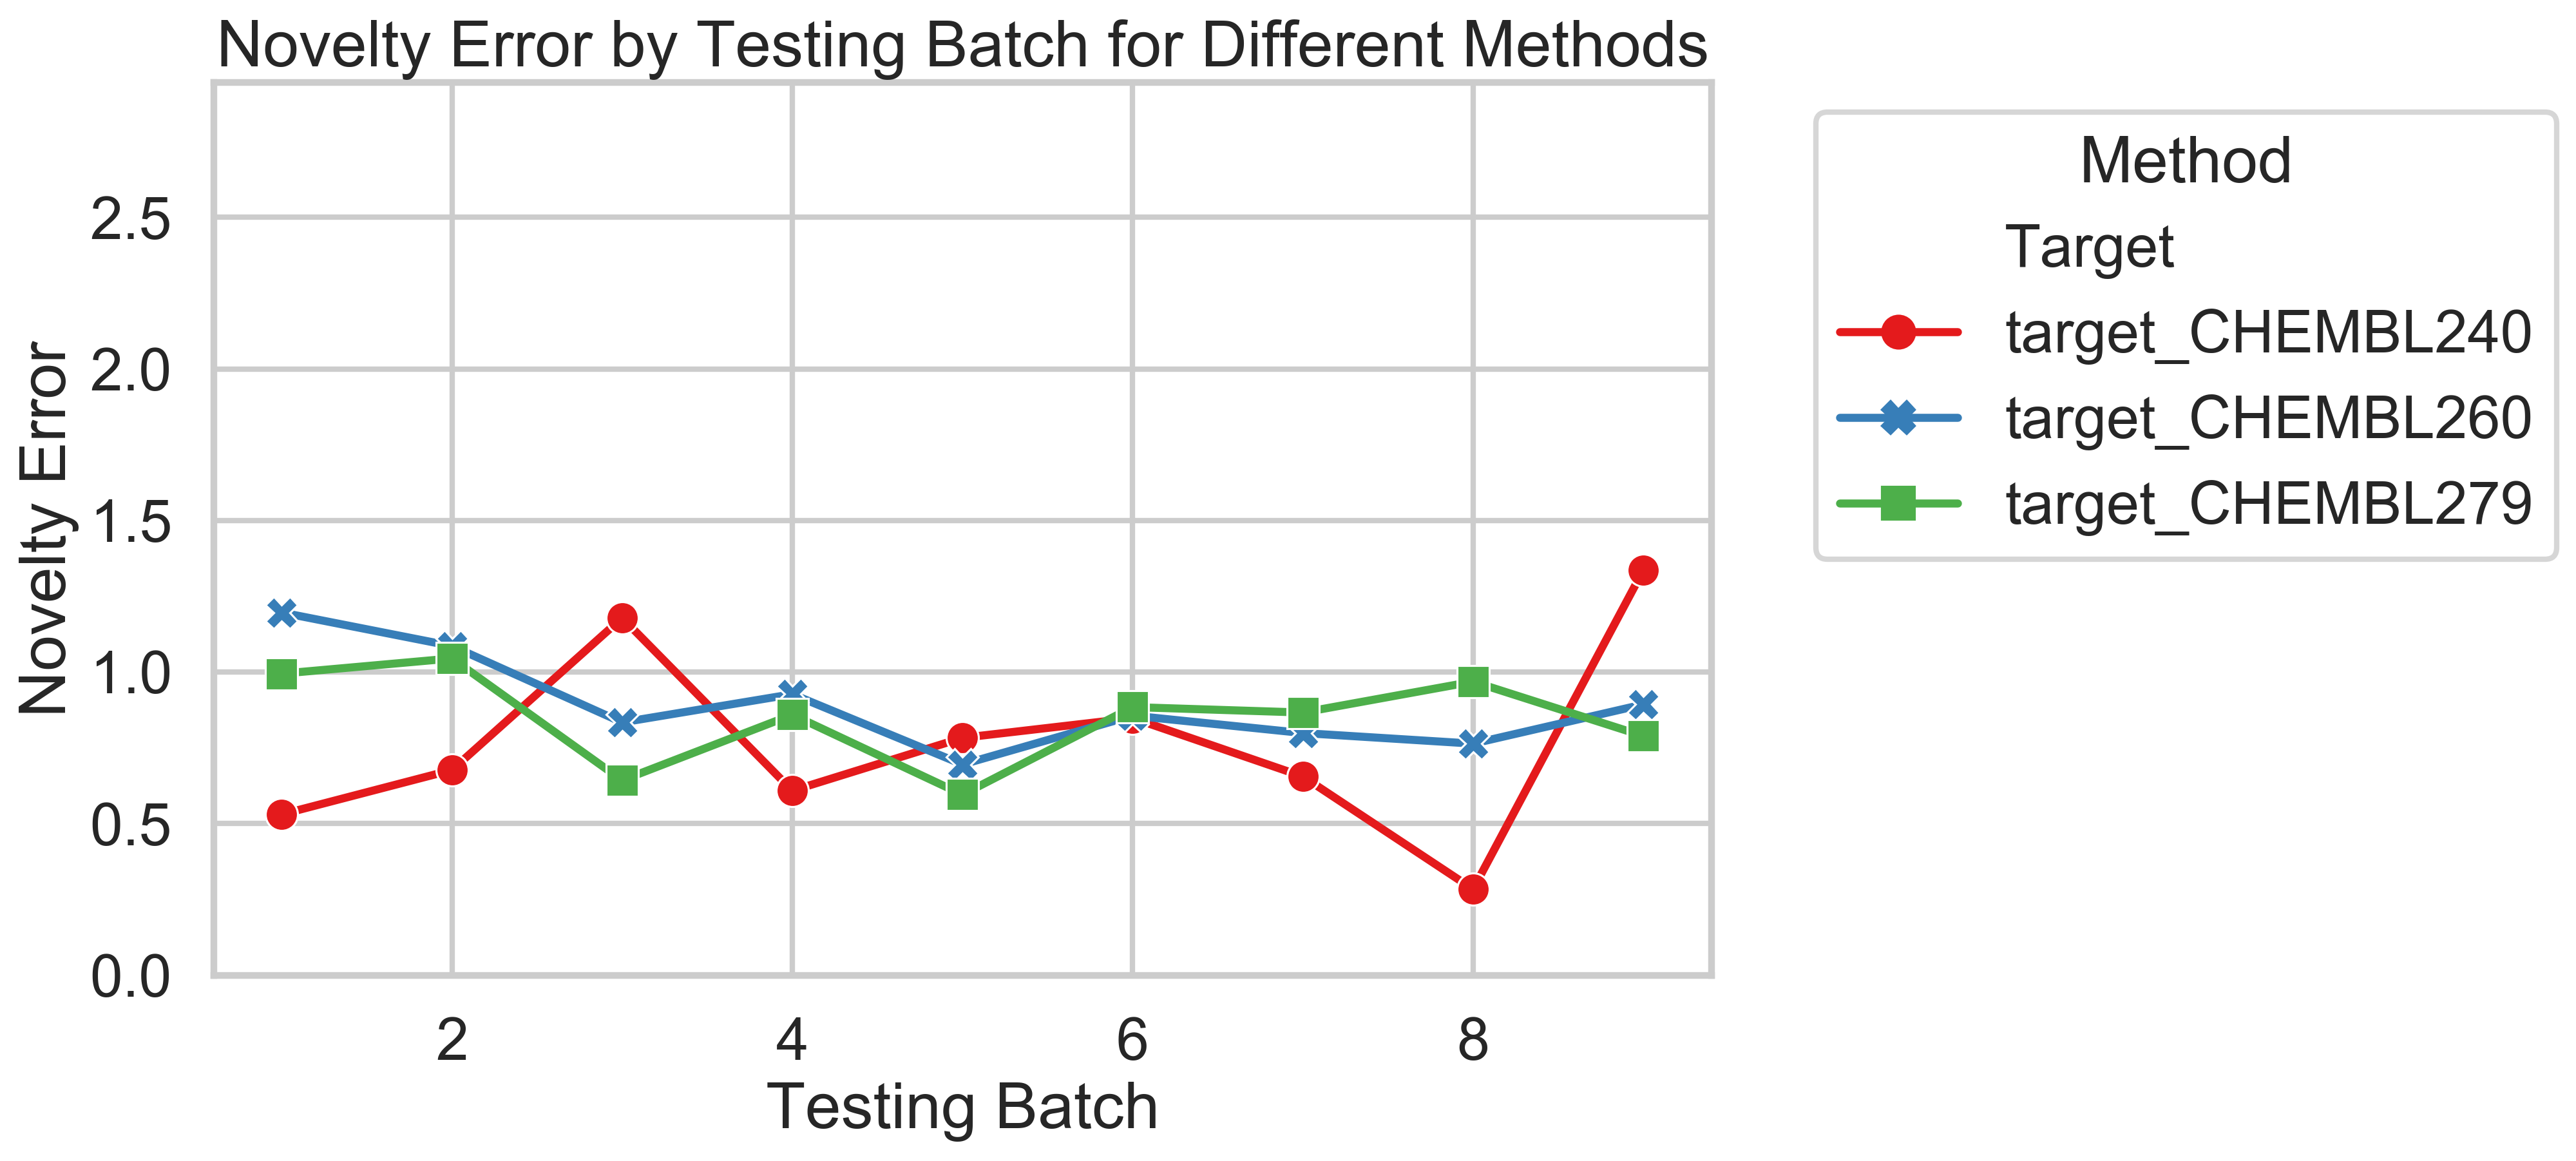

unsorted_fcv


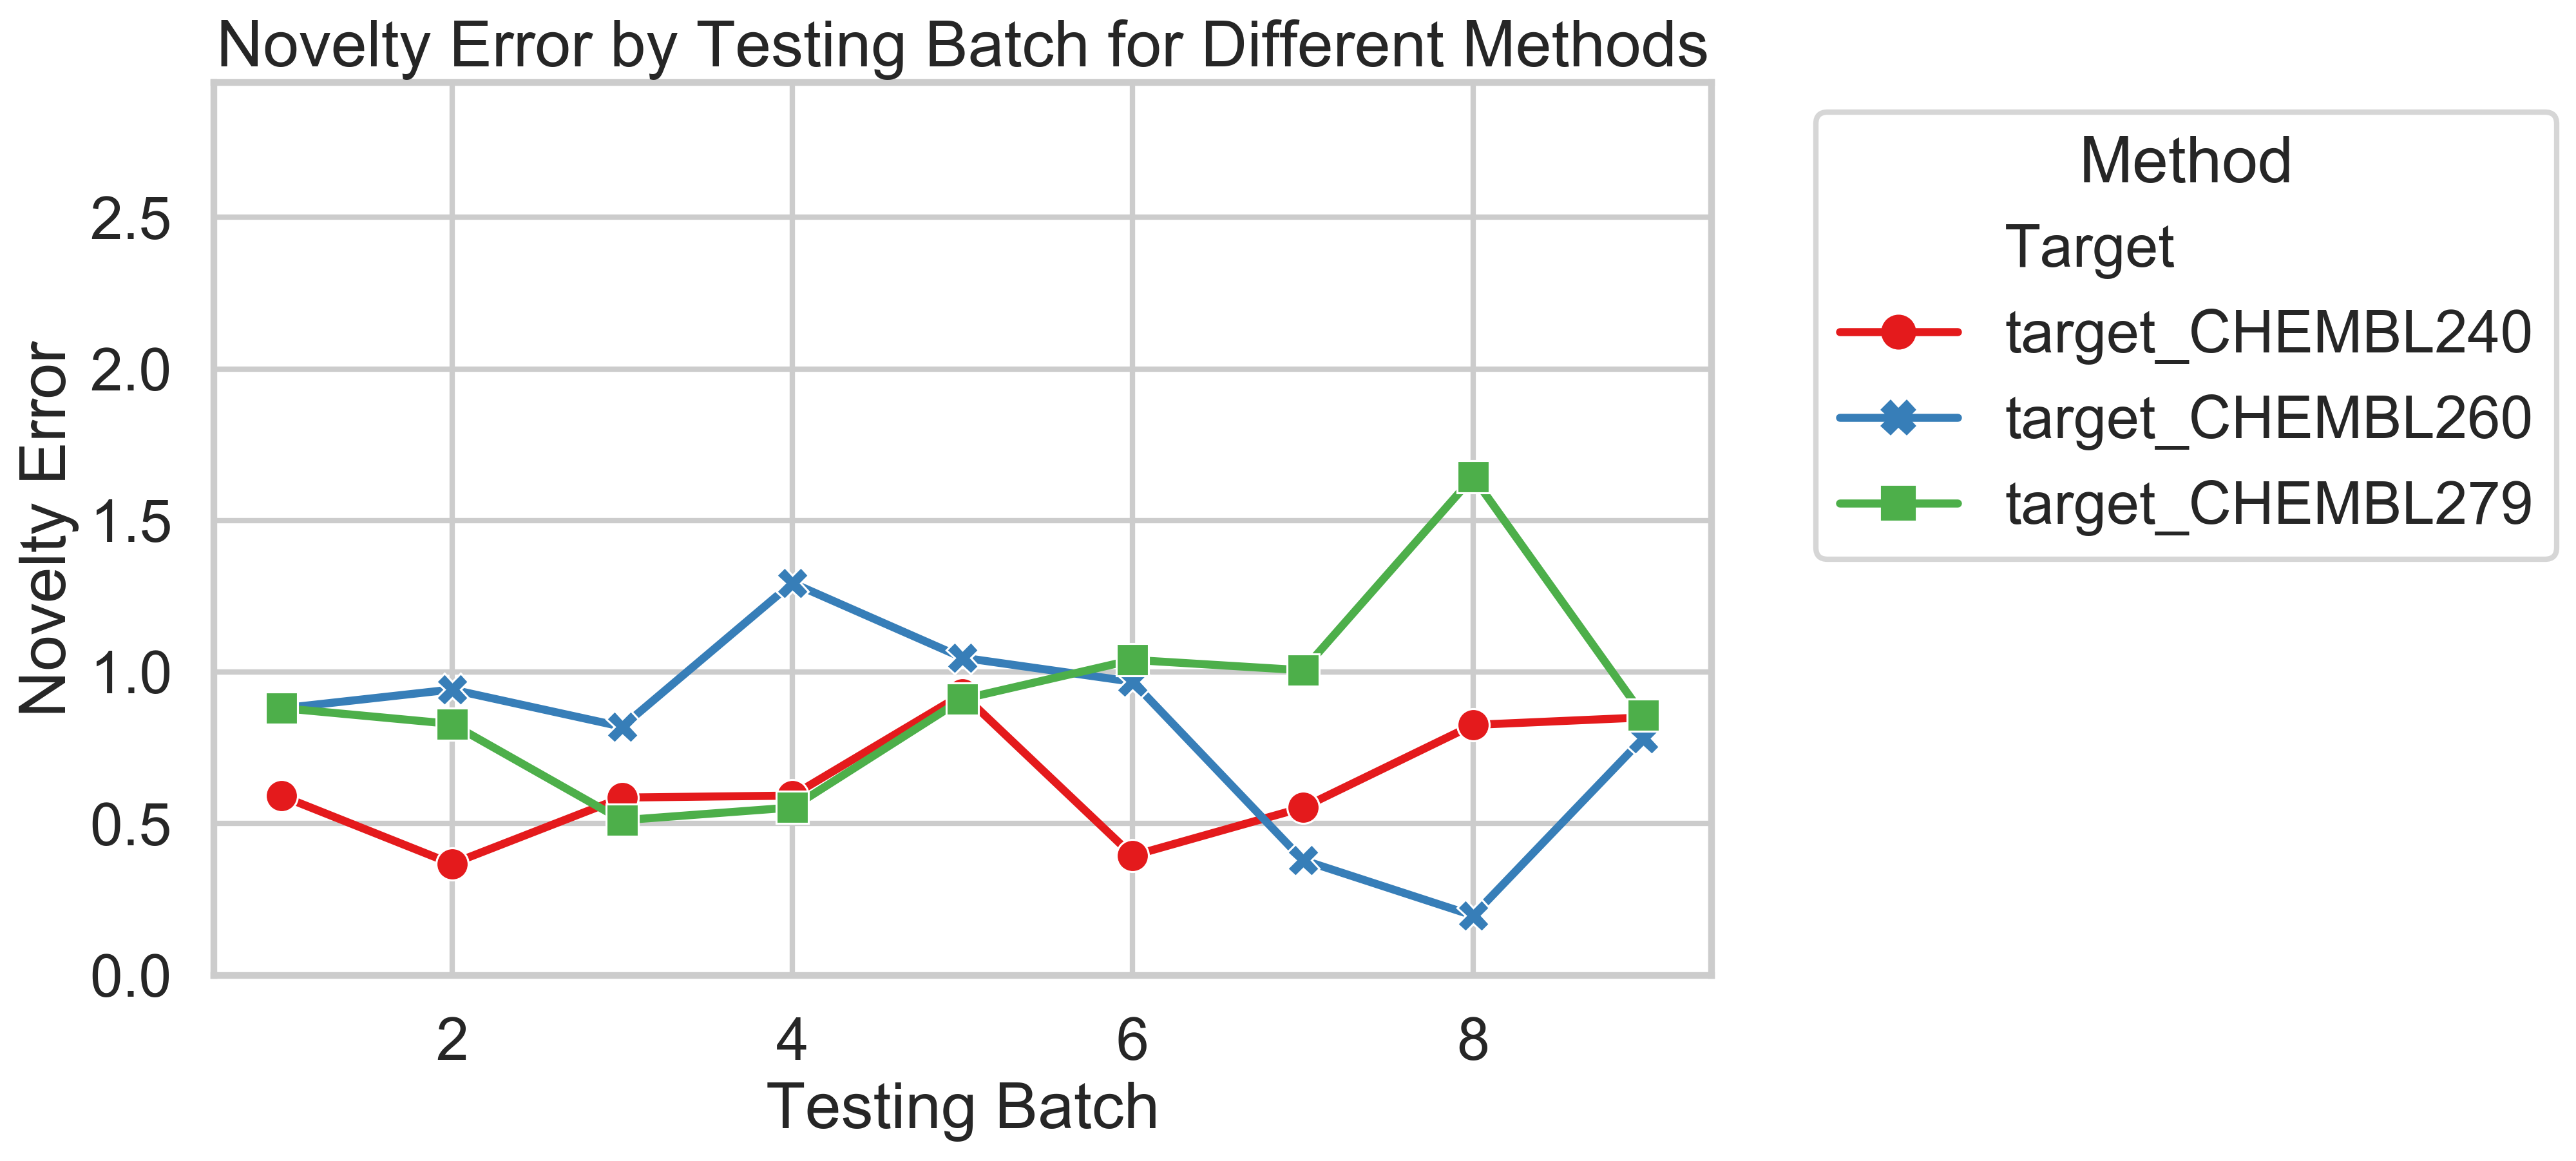

CV


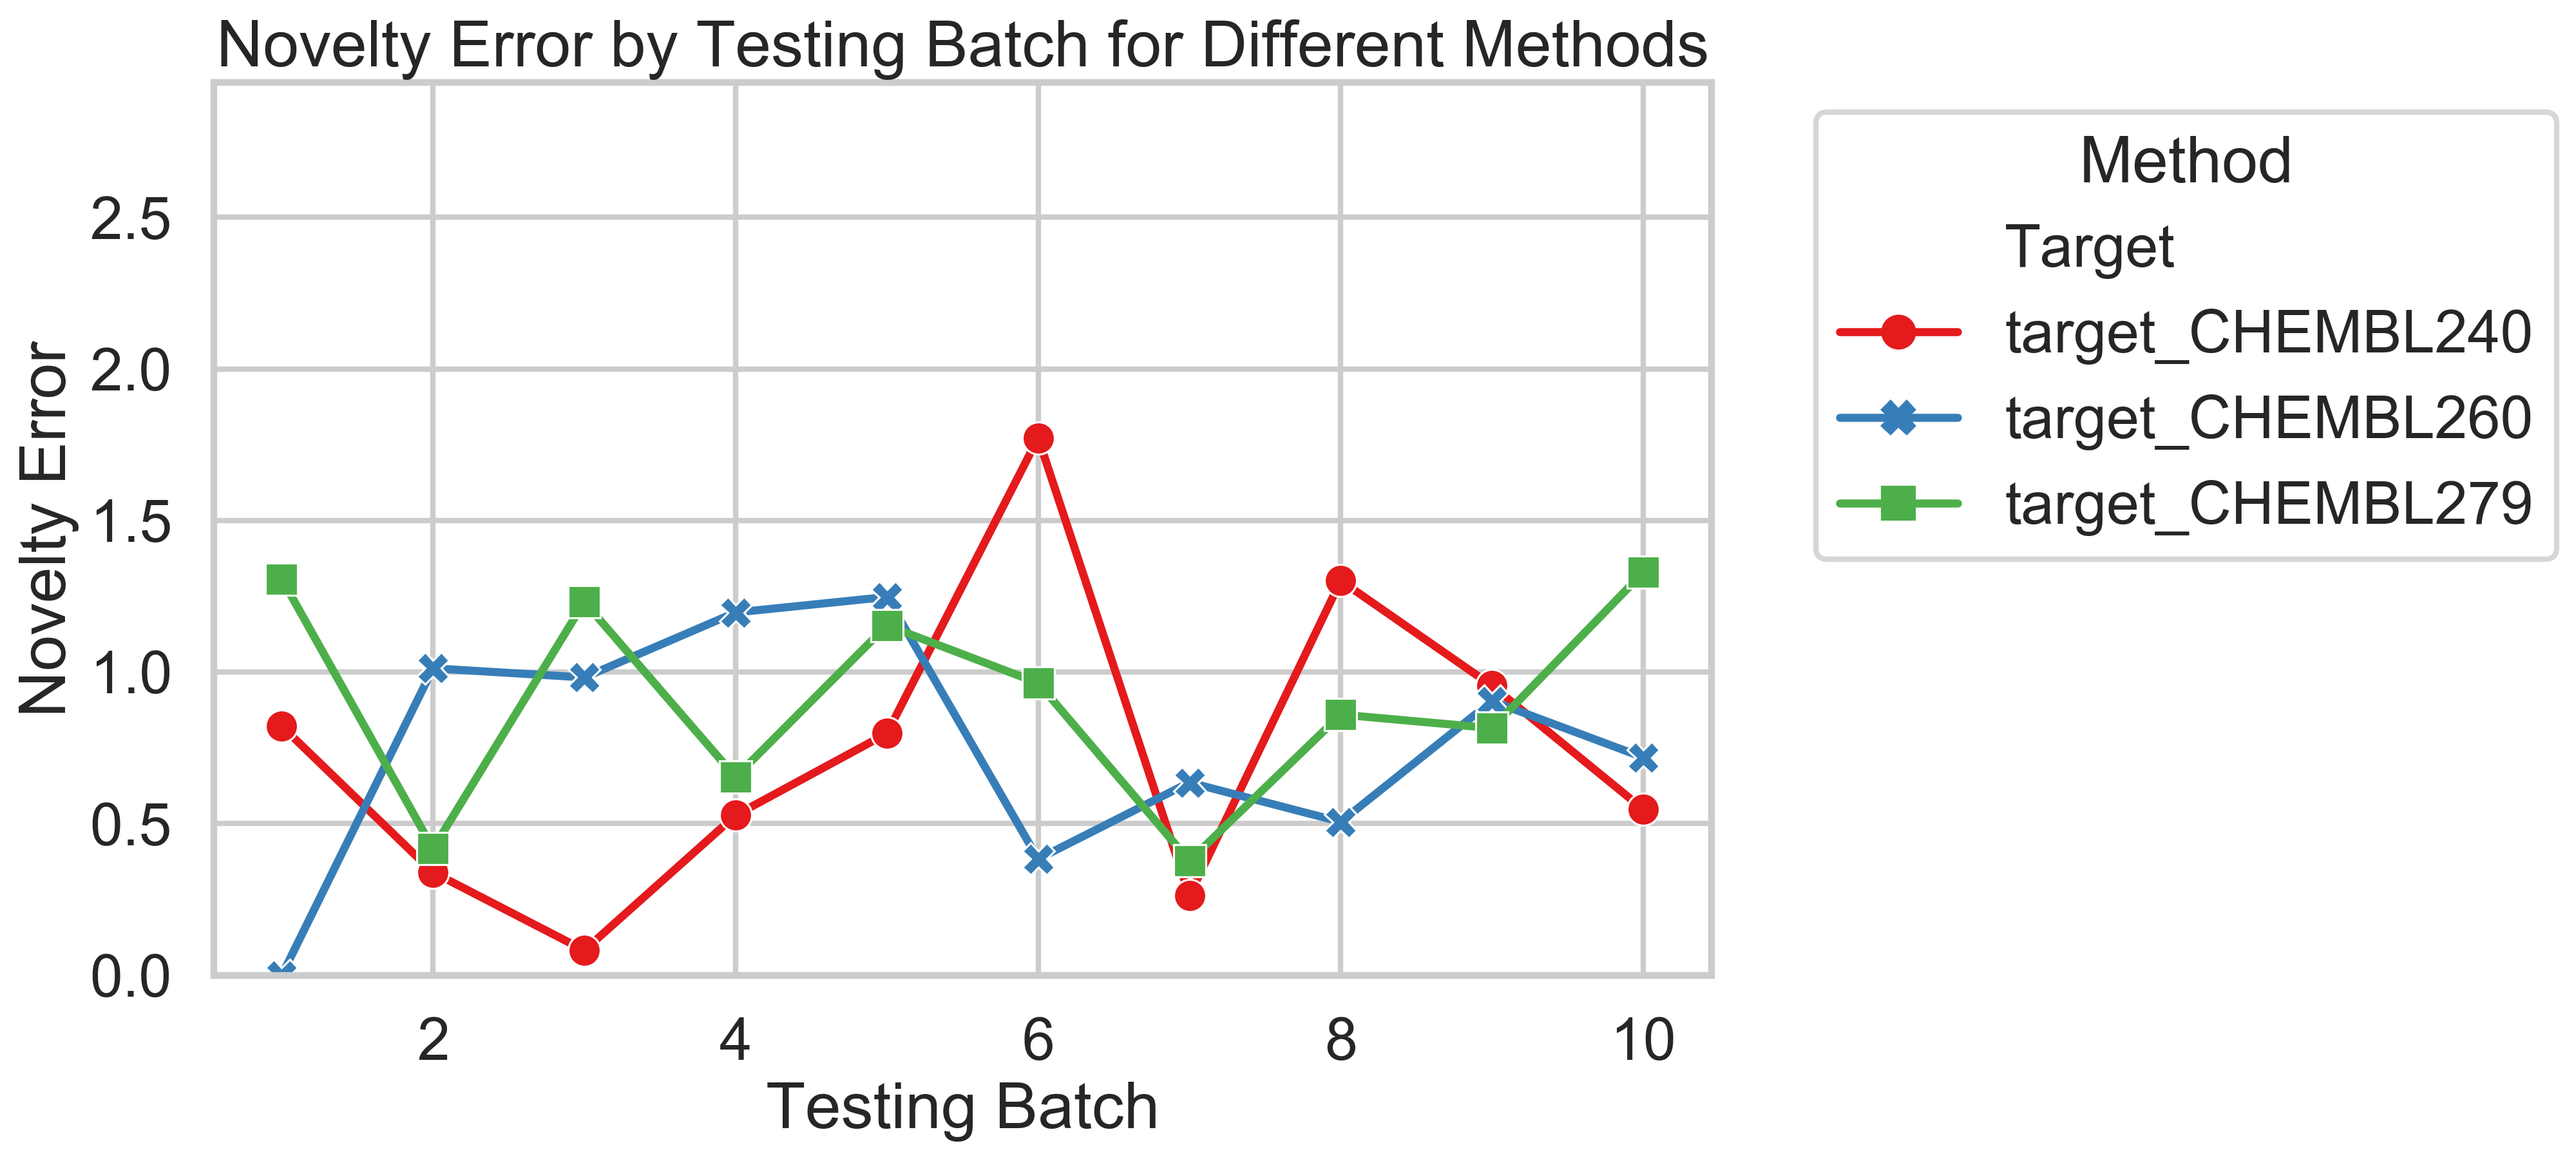

scaffold_CV


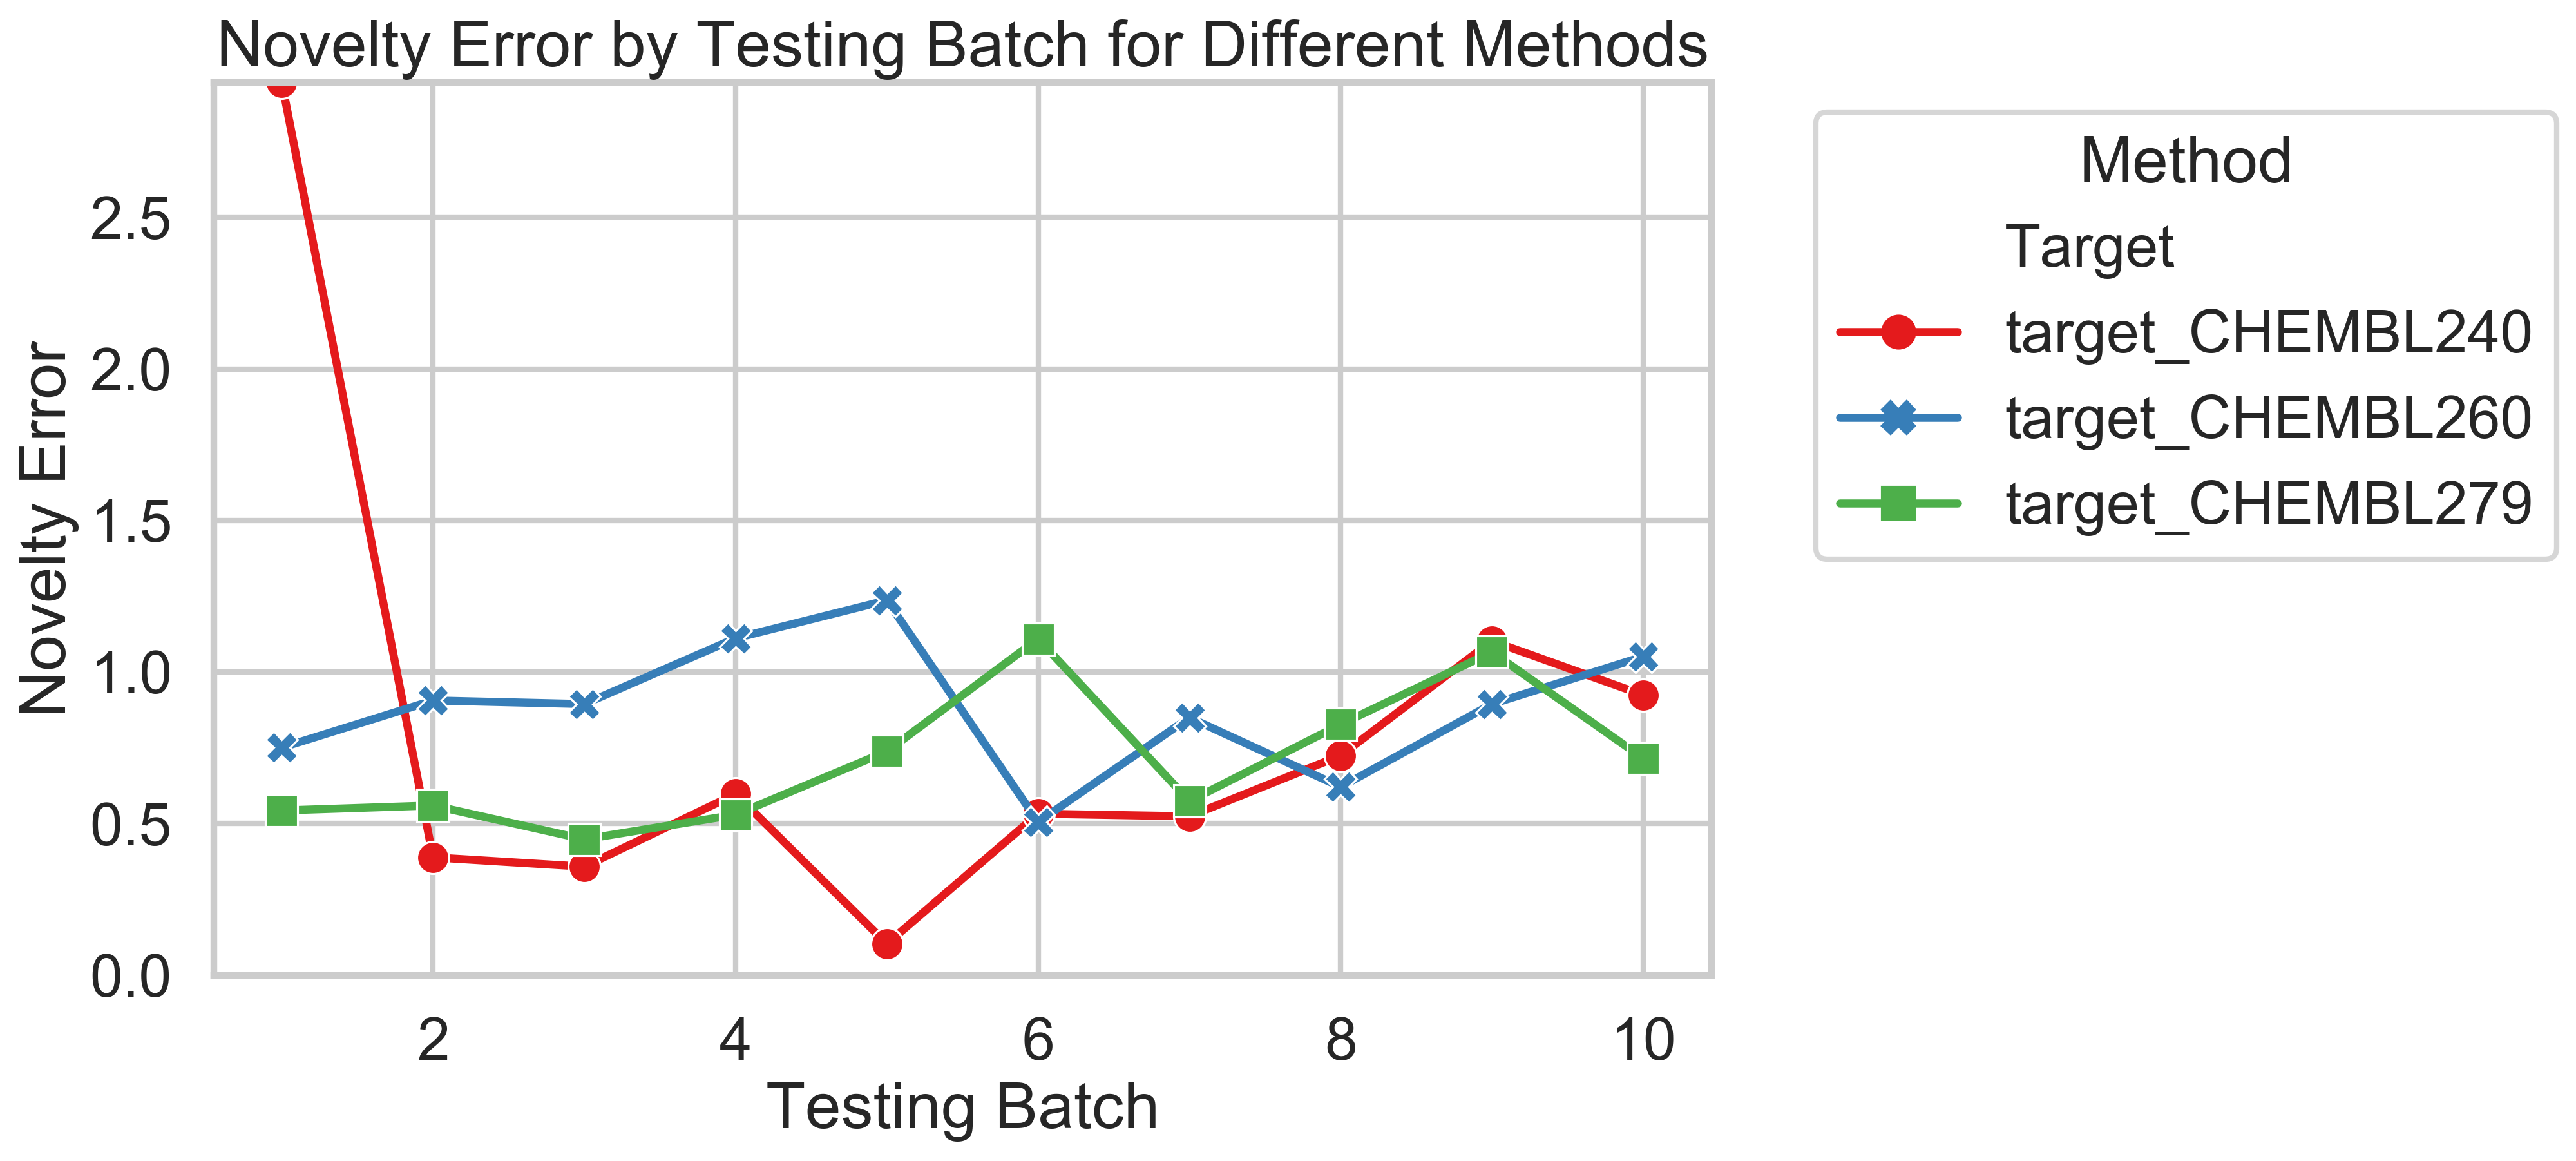

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

sns.set_context("poster")

# First, determine the global minimum and maximum Discovery Yield values to set the y-axis limits
global_min = df[(df["Method"] == "RF") & (df["Variable"] != "pchembl")]['Novelty Error'].min()
global_max = df[(df["Method"] == "RF") & (df["Variable"] != "pchembl")]['Novelty Error'].max()

# Iterating through each unique 'evalt' value
for evalt in df.evalt.unique():
    print(evalt)
    
    # Filtering the DataFrame for the specific conditions
    test = df[(df["Method"] == "RF") & (df["Variable"] != "pchembl") & (df["evalt"] == evalt)]

    # Set up the visualization
    plt.figure(figsize=(10, 6), dpi=300)

    # Create a line plot with scatter points
    sns.lineplot(data=test, x='Batch', y='Novelty Error', hue='Target', 
                 marker='o', palette='Set1', markers=True, style='Target', dashes=False)

    # Customize the plot
    plt.title('Novelty Error by Testing Batch for Different Methods')
    plt.xlabel('Testing Batch')
    plt.ylabel('Novelty Error')
    plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Set the y-axis limits based on the global min and max values
    plt.ylim(global_min, global_max)

    # Show the plot
    plt.show()

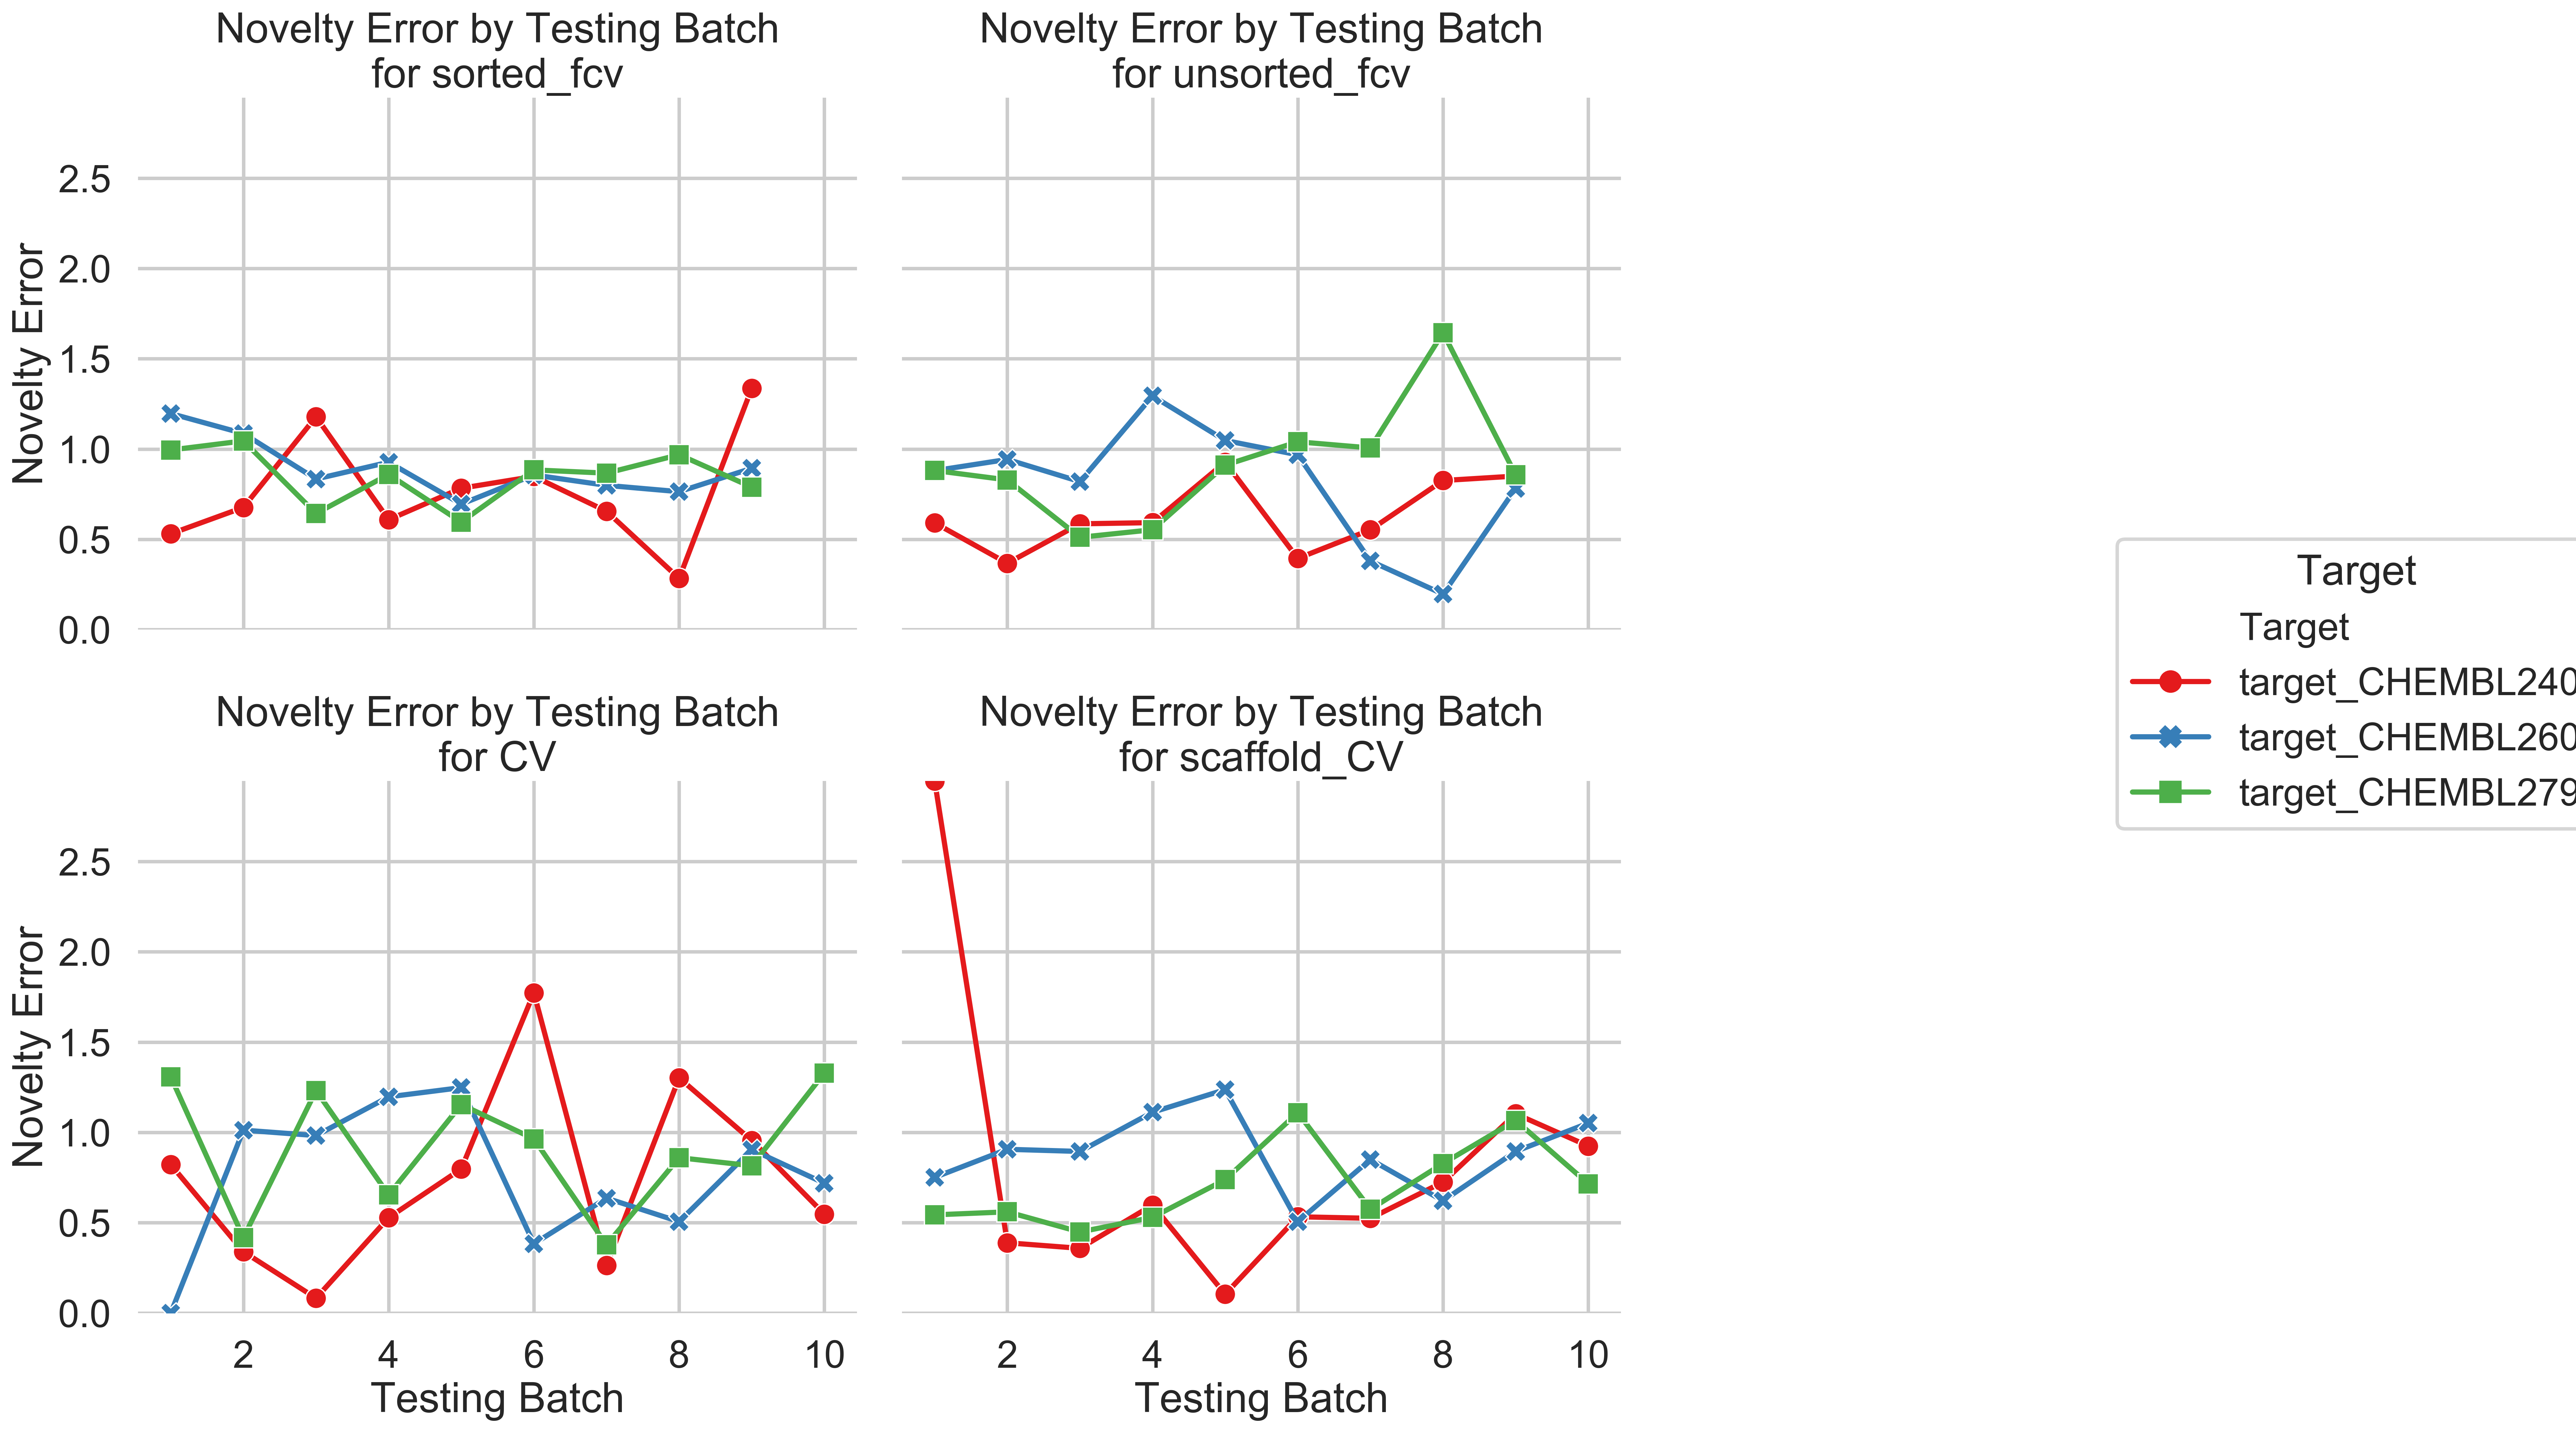

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetic style of the plots
sns.set(style="whitegrid")
sns.set_context("poster")

# Determine the global minimum and maximum Novelty Error values to set the y-axis limits
global_min = df[(df["Method"] == "RF") & (df["Variable"] != "pchembl")]['Novelty Error'].min()
global_max = df[(df["Method"] == "RF") & (df["Variable"] != "pchembl")]['Novelty Error'].max()

# Get unique evalt values
evalt_values = df.evalt.unique()

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12), dpi=400, sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through each unique 'evalt' value
for i, evalt in enumerate(evalt_values):
    if i >= 4:
        break  # Only create up to 4 plots

    # Filtering the DataFrame for the specific conditions
    test = df[(df["Method"] == "RF") & (df["Variable"] != "pchembl") & (df["evalt"] == evalt)]

    # Create a line plot with scatter points
    sns.lineplot(data=test, x='Batch', y='Novelty Error', hue='Target', 
                 marker='o', palette='Set1', markers=True, style='Target', dashes=False, ax=axes[i])

    # Customize the plot
    axes[i].set_title(f'Novelty Error by Testing Batch\nfor {evalt}')
    axes[i].set_xlabel('Testing Batch')
    axes[i].set_ylabel('Novelty Error')

# Set the y-axis limits based on the global min and max values
for ax in axes:
    ax.set_ylim(global_min, global_max)

# Create a single legend outside the plots
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Target', bbox_to_anchor=(1.05, 0.5), loc='center left')

# Remove individual legends from subplots
for ax in axes:
    ax.legend_.remove()

# Remove the border of each subplot
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Adjust layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()


target_CHEMBL240


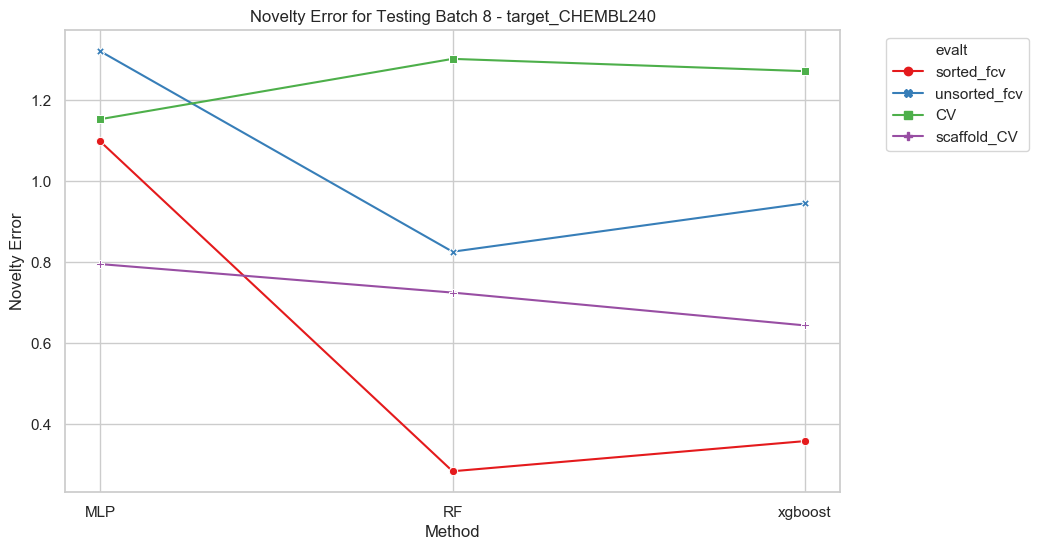

target_CHEMBL260


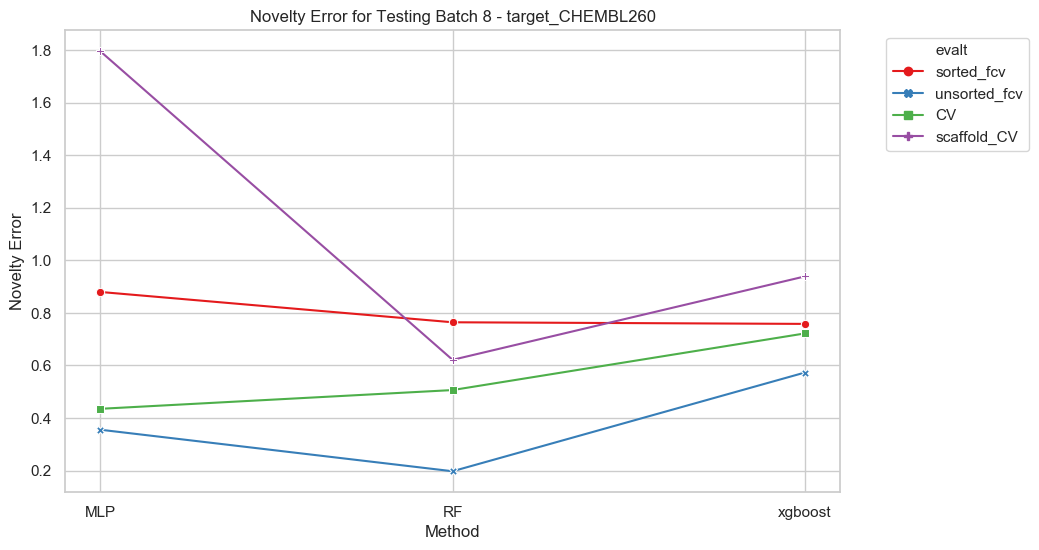

target_CHEMBL279


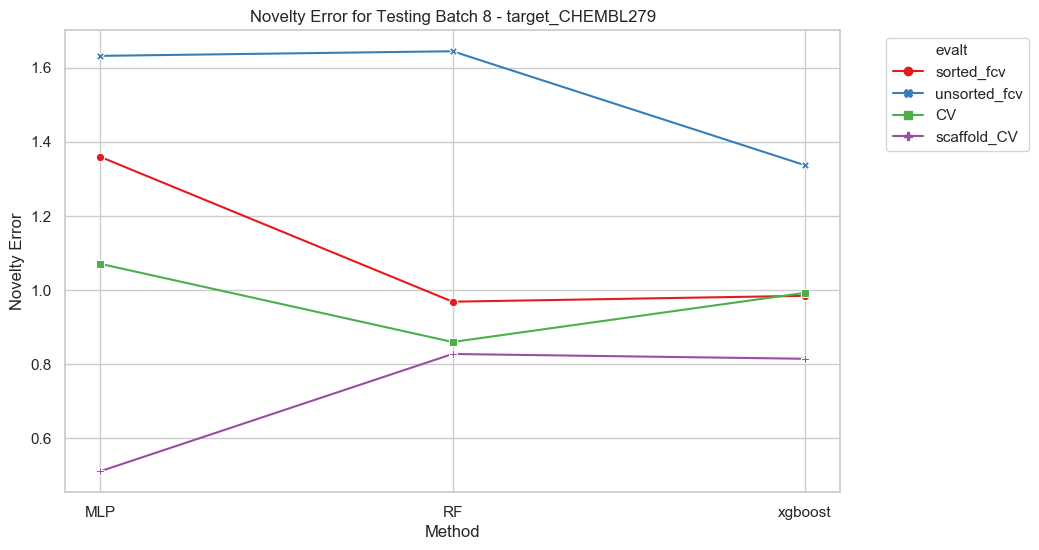

In [39]:
sns.set(style="whitegrid")
    
for target in df.Target.unique():
    print(target)
    test = df[df["Target"]==target]
    test = test[test["Variable"]!="pchembl"]
    test = test[test["Batch"] == 8]
    
    plt.figure(figsize=(10, 6))
    # Create a line plot with scatter points for each target
    sns.lineplot(data=test, x='Method', y='Novelty Error', hue='evalt', marker='o', 
                 palette='Set1', markers=True, style='evalt', dashes=False)

    # Customize the plot
    plt.title(f'Novelty Error for Testing Batch 8 - {target}')
    plt.ylabel('Novelty Error')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


    # Show the plot
    plt.show()
    

target_CHEMBL240


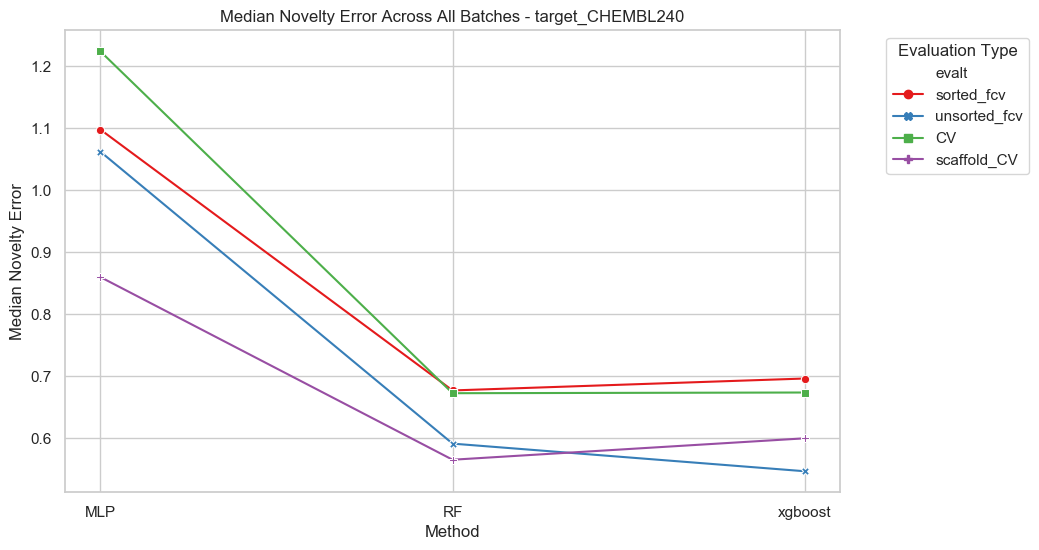

target_CHEMBL260


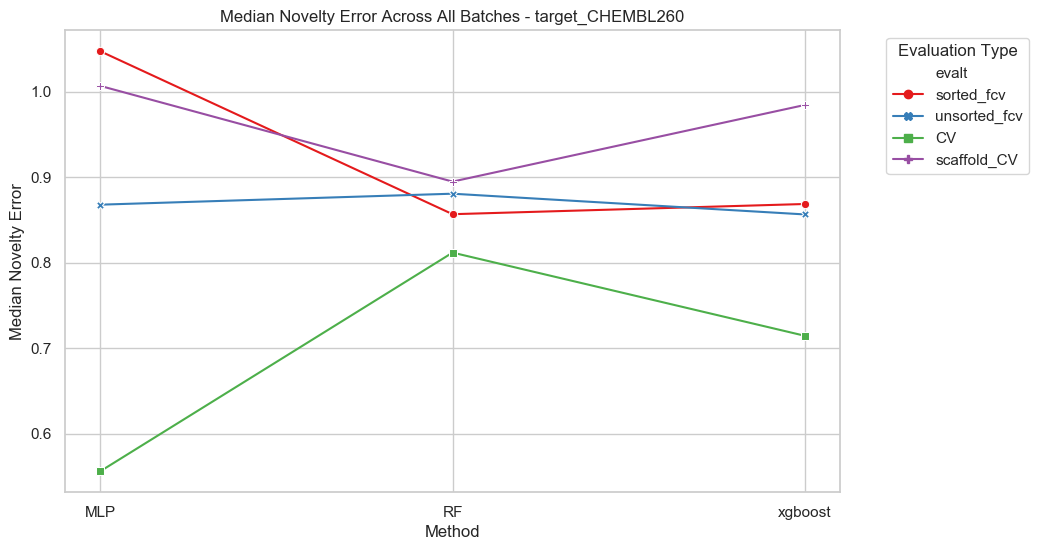

target_CHEMBL279


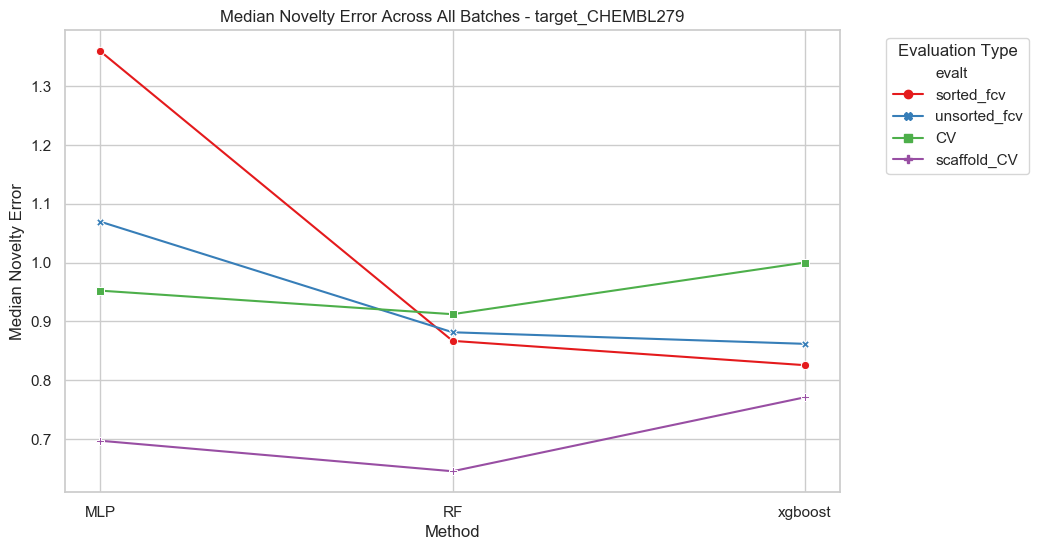

In [40]:
from pandas.api.types import CategoricalDtype

for target in df['Target'].unique():
    print(target)
    test = df[df["Target"] == target]
    test = test[test["Variable"] != "pchembl"]
    
    # Define the order for the 'evalt' categories
    
    cat_type = CategoricalDtype(categories=["sorted_fcv", "unsorted_fcv", "CV", "scaffold_CV"], ordered=True)

    # Apply the custom categorical order to the 'evalt' column
    test['evalt'] = test['evalt'].astype(cat_type)

    # Calculate median Discovery Yield
    median_rmse = test.groupby(['Method', 'evalt'])['Novelty Error'].median().reset_index()

    # Sort the DataFrame by 'evalt' using the defined order
    median_rmse = median_rmse.sort_values('evalt')

    
    plt.figure(figsize=(10, 6))
    # Create a line plot with scatter points for each target
    sns.lineplot(data=median_rmse, x='Method', y='Novelty Error', hue='evalt', marker='o', 
                 palette='Set1', markers=True, style='evalt', dashes=False)

    # Customize the plot
    plt.title(f'Median Novelty Error Across All Batches - {target}')
    plt.xlabel('Method')
    plt.ylabel('Median Novelty Error')
    plt.legend(title='Evaluation Type', bbox_to_anchor=(1.05, 1), loc='upper left')

    # Show the plot
    plt.show()
